## 1. Install Needed Resources

In [42]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [43]:
os.chdir('/Users/Rachel/Desktop/AtomicIOT/Rachel/Sagemaker/Data/')
os.getcwd()

'/Users/Rachel/Desktop/AtomicIOT/Rachel/Sagemaker/Data'

## 2. Analysis about Original Data Set
* Data from Aug, 2017 to Oct, 2017

In [44]:
train_original = pd.read_csv('AUGandOCT.csv')

In [45]:
train_original.shape

(722, 26)

In [46]:
train_original.isnull().sum()

id_orig_p_num       0
id_resp_h_num       0
id_resp_p_num       0
proto_num           0
conn_state_num      0
history_num         0
orig_bt_sum         0
resp_bt_sum         0
orig_pk_sum         0
resp_pk_sum         0
orig_bt_std         0
resp_bt_std         0
uri_num           722
usr_agent_text    722
query_num           0
CN                722
OU                722
O                 722
up_down             0
Device              0
IOT                 0
SAX_resp_h          0
mac                 0
query_text        142
ts                  0
user_agent        722
dtype: int64

In [47]:
train_original[['uri_num','query_num','CN','OU','O']] = \
train_original[['uri_num','query_num','CN','OU','O']].fillna(0)

In [48]:
#define the hamming distance to the baseline SAX value
def hamdist(str1, str2):        
        diffs = 0
        for ch1, ch2 in zip(str1, str2):
                if ch1 != ch2:
                        diffs += 1
        return diffs
train_original['SAX_resp_ham']=train_original.SAX_resp_h.apply(lambda x: hamdist(x,'bbbbbbbbbbbbbbbbbbbbbbbb'))

In [49]:
train_original = train_original.drop(['mac','ts'],1)
Feature_Original = ['id_resp_h_num','proto_num','conn_state_num','history_num',
           'orig_bt_sum','resp_bt_sum','orig_bt_std','resp_bt_std',
           'uri_num','query_num','up_down','SAX_resp_ham','O','OU','IOT','Device']
train_original = train_original[Feature_Original]

In [50]:
train_original.describe()

,id_resp_h_num,proto_num,conn_state_num,history_num,orig_bt_sum,resp_bt_sum,orig_bt_std,resp_bt_std,uri_num,query_num,up_down,SAX_resp_ham,O,OU
count,722.000000,722.000000,722.000000,722.000000,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,722.0,722.000000,722.000000,722.000000,722.0,722.0
mean,73.993075,0.680055,3.462604,15.699446,6.372408e+06,1.090575e+08,8.279361e+04,1.749916e+06,0.0,31.258243,1.021681,20.973684,0.0,0.0
std,216.486280,0.466778,3.834924,26.160917,4.009583e+07,4.932895e+08,5.723388e+05,6.583850e+06,0.0,102.311154,3.003802,5.751259,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e-01,2.466868e+02,2.717376e+03,0.0,1.000000,0.000000,22.000000,0.0,0.0
50%,4.000000,1.000000,2.000000,3.000000,1.714400e+04,4.619700e+04,4.868345e+03,4.790605e+04,0.0,2.000000,0.007524,24.000000,0.0,0.0
75%,46.000000,1.000000,6.000000,18.000000,1.002370e+06,1.331279e+07,1.423429e+04,8.465970e+05,0.0,10.000000,0.229844,24.000000,0.0,0.0
max,2695.000000,1.000000,13.000000,164.000000,7.220994e+08,6.755023e+09,1.052104e+07,8.130062e+07,0.0,849.000000,46.089490,24.000000,0.0,0.0


## 3. Analysis about All Data We Have
* Data from Aug, 2017 to Oct, 2017 plus Data from Nov, 2017 to Jun, 2018


In [51]:
train_new = pd.read_csv('Cleaned_Data_Orig(17_11-18_06)/Cleaned_Data_Orig(17_11-18_06).csv')

In [52]:
train_new.shape

(7120, 26)

In [53]:
train_new.describe()

,id_orig_p_num,id_resp_h_num,id_resp_p_num,proto_num,conn_state_num,history_num,orig_bt_sum,resp_bt_sum,orig_pk_sum,resp_pk_sum,orig_bt_std,resp_bt_std,uri_num,query_num,CN,OU,O,up_down,SAX_resp_ham
count,7120.00000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7.120000e+03,7.120000e+03,7.120000e+03,7.120000e+03,7.120000e+03,7.120000e+03,7119.000000,7120.000000,5944.000000,5944.000000,5944.000000,7120.000000,7120.000000
mean,192.45323,29.651404,1.195506,0.536798,0.727388,7.015028,7.258450e+07,8.386834e+07,1.799110e+04,3.220105e+04,4.716751e+06,7.168806e+06,40.473556,12.576671,12.099260,5.010094,3.326716,74.848445,22.570084
std,863.73713,130.426866,2.230560,0.498679,0.853001,15.986164,1.020714e+09,1.216240e+09,1.266308e+05,2.384028e+05,2.444541e+07,2.686257e+07,299.496461,51.788479,46.930205,17.901385,11.586469,1327.585434,4.101004
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,1.193992e+03,1.101773e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.001500e+03,3.655000e+03,1.400000e+01,1.100000e+01,7.586847e+03,1.459348e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000455,24.000000
75%,31.00000,7.000000,2.000000,1.000000,2.000000,5.000000,1.089020e+05,6.403472e+05,2.293000e+03,2.831500e+03,2.489567e+04,7.790829e+06,4.000000,5.000000,6.000000,2.000000,2.000000,0.195955,24.000000
max,16375.00000,2176.000000,82.000000,1.000000,4.000000,172.000000,2.040567e+10,8.130656e+10,4.556398e+06,1.015801e+07,4.257003e+08,1.138044e+09,13259.000000,756.000000,619.000000,204.000000,141.000000,74311.057433,24.000000


In [54]:
train_new.isnull().sum()

id_orig_p_num        0
id_resp_h_num        0
id_resp_p_num        0
proto_num            0
conn_state_num       0
history_num          0
orig_bt_sum          0
resp_bt_sum          0
orig_pk_sum          0
resp_pk_sum          0
orig_bt_std          0
resp_bt_std          0
uri_num              1
query_num            0
CN                1176
OU                1176
O                 1176
up_down              0
SAX_resp_ham         0
Device               0
IOT                  0
SAX_resp_h           0
mac                  0
query_text           6
ts                   0
user_agent        4492
dtype: int64

In [55]:
train_new[['uri_num','query_num','CN','OU','O']] = \
train_new[['uri_num','query_num','CN','OU','O']].fillna(0)
train_new = train_new.drop(['mac','ts'],1)
train_new = train_new[Feature_Original]

In [ ]:
data = train_original.append(train_new, ignore_index = True)

In [58]:
data.shape

(7842, 16)

In [60]:
data.isnull().sum()

id_resp_h_num     0
proto_num         0
conn_state_num    0
history_num       0
orig_bt_sum       0
resp_bt_sum       0
orig_bt_std       0
resp_bt_std       0
uri_num           0
query_num         0
up_down           0
SAX_resp_ham      0
O                 0
OU                0
IOT               0
Device            0
dtype: int64

In [61]:
train = data.sample(frac=0.7)
test = data.loc[~data.index.isin(train.index)]

In [62]:
train.shape

(5489, 16)

In [63]:
test.shape

(2353, 16)

In [65]:
corr = train.corr()
corr.style.background_gradient().set_precision(2)

,id_resp_h_num,proto_num,conn_state_num,history_num,orig_bt_sum,resp_bt_sum,orig_bt_std,resp_bt_std,uri_num,query_num,up_down,SAX_resp_ham,O,OU
id_resp_h_num,1,0.21,0.38,0.8,-0.0047,0.23,-0.037,0.023,0.65,0.93,-0.0079,-0.15,0.81,0.81
proto_num,0.21,1,0.54,0.41,0.064,0.09,-0.082,-0.14,0.13,0.2,0.05,-0.33,0.22,0.22
conn_state_num,0.38,0.54,1,0.62,0.0098,0.12,-0.066,-0.055,0.099,0.35,0.0039,-0.18,0.16,0.15
history_num,0.8,0.41,0.62,1,0.0087,0.29,-0.052,0.069,0.45,0.76,-0.00065,-0.15,0.71,0.73
orig_bt_sum,-0.0047,0.064,0.0098,0.0087,1,-0.0058,0.77,-0.019,-0.0071,-0.011,0.61,0.023,-0.00017,-0.0046
resp_bt_sum,0.23,0.09,0.12,0.29,-0.0058,1,-0.018,0.69,0.18,0.19,-0.0053,-0.032,0.22,0.22
orig_bt_std,-0.037,-0.082,-0.066,-0.052,0.77,-0.018,1,0.042,-0.027,-0.043,0.63,0.052,-0.033,-0.036
resp_bt_std,0.023,-0.14,-0.055,0.069,-0.019,0.69,0.042,1,0.024,0.01,-0.015,0.034,0.036,0.042
uri_num,0.65,0.13,0.099,0.45,-0.0071,0.18,-0.027,0.024,1,0.58,-0.008,-0.11,0.65,0.64
query_num,0.93,0.2,0.35,0.76,-0.011,0.19,-0.043,0.01,0.58,1,-0.012,-0.15,0.8,0.8


## 4. IoT Detection Model
* 3 models were built in this section 
* 1st, all of the 9 features were included in this model
* 2nd, 7 features were included in this model
* 3rd, only 5 features were included in this model



### 4.1 Model1 ( 9 features included)
* ['proto_num','conn_state_num','orig_bt_std','resp_bt_std','uri_num','query_num','up_down','SAX_resp_ham','OU','IOT','Device']

In [66]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

/Users/Rachel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Rachel/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [67]:
Feature_New1 = ['proto_num','conn_state_num','orig_bt_std','resp_bt_std',
               'uri_num','query_num','up_down','SAX_resp_ham','OU','IOT','Device']

In [68]:
train = train[Feature_New1]
test = test[Feature_New1]

In [69]:
def encode(x):
    le=LabelEncoder()
    le.fit(x)
    x=le.transform(x)
    return x

In [70]:
ex=''
X1 = train.drop(['IOT','Device'],1)[train.Device != ex]
yt1 = encode(train['IOT'][train.Device != ex])
X_train1 , X_test1, yt_train1, yt_test1 = train_test_split(X1, yt1, test_size = 0.2)

In [71]:
X_train1.shape

(4391, 9)

In [109]:
X_test1.shape

(1098, 9)

In [72]:
xgb_model = xgb.XGBClassifier()
parameters = {'objective':['binary:logistic'],
              'learning_rate': [0.05,0.1,0.2], #so called `eta` value
              'max_depth': [6,7,8],#depth of the tree
              'silent': [1],
              'subsample': [0.5,0.8],#each tree contains x% of the training data
              'colsample_bytree': [0.7,0.8],#how many column,feature you want to use in each tree
              'n_estimators': [1000]} #number of trees, change it to 1000 for better results}

clf = GridSearchCV(xgb_model, parameters, n_jobs=1, 
                   scoring='roc_auc',
                   refit=True)
clf.fit(X_train1, yt_train1)

best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))


Raw AUC score: 0.994093030317481
colsample_bytree: 0.8
learning_rate: 0.05
max_depth: 8
n_estimators: 1000
objective: 'binary:logistic'
silent: 1
subsample: 0.8


In [73]:
bt1 = xgb.XGBClassifier(max_depth=8,learning_rate=0.05,n_estimators=1000,colsample_bytree=0.8,silent=1,subsample=0.8)
bt1.fit(X_train1, yt_train1, eval_set=[(X_test1, yt_test1)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.8)

In [74]:
test_X =test.drop(['IOT','Device'],1)
test_y = encode(test['IOT'])

In [75]:
test_X.shape

(2353, 9)

In [76]:
y_pred1 = bt1.predict(test_X)
confusion_matrix(test_y,y_pred1)

array([[1115,   25],
       [  42, 1171]])

In [77]:
acc1 = np.array(test_y==y_pred1).sum() / test_y.shape[0]
acc1

0.9715257118572036

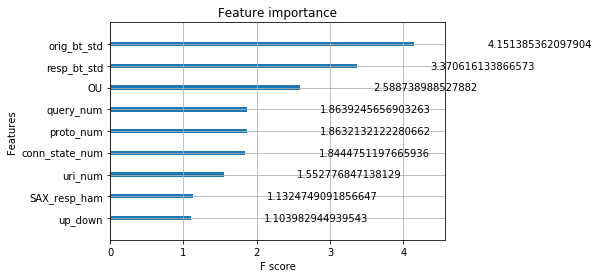

In [78]:
xgb.plot_importance(bt1, importance_type='gain')
plt.savefig('IoTDetection-9Features')
plt.show()

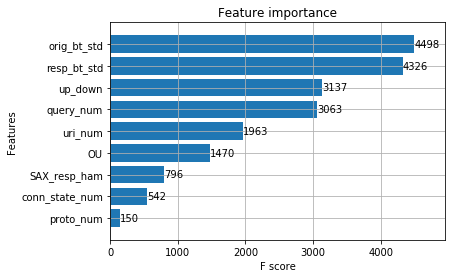

In [79]:
xgb.plot_importance(bt1, height=0.8)
plt.show()

### 4.2 Model2 ( 7 features included)
* ['proto_num','orig_bt_std','resp_bt_std','uri_num','up_down','SAX_resp_ham','OU','IOT','Device']

In [84]:
Feature_New2 =  ['proto_num','orig_bt_std','resp_bt_std','uri_num','up_down','SAX_resp_ham','OU']

In [85]:
X_train1.shape

(4391, 9)

In [87]:
X_train1.describe()

,proto_num,conn_state_num,orig_bt_std,resp_bt_std,uri_num,query_num,up_down,SAX_resp_ham,OU
count,4391.000000,4391.000000,4.391000e+03,4.391000e+03,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000
mean,0.546345,0.979504,4.047298e+06,6.633492e+06,31.819776,13.704236,52.829893,22.455477,3.625826
std,0.497904,1.630305,2.210378e+07,2.538476e+07,210.120027,56.965492,754.628777,4.278384,15.159233
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.069121e+03,1.091708e+04,0.000000,0.000000,0.000000,23.000000,0.000000
50%,1.000000,0.000000,7.442964e+03,1.353734e+05,0.000000,1.000000,0.000431,24.000000,0.000000
75%,1.000000,2.000000,2.169372e+04,7.583877e+06,3.000000,5.000000,0.195953,24.000000,2.000000
max,1.000000,12.000000,3.241667e+08,6.526352e+08,6898.000000,849.000000,15400.936272,24.000000,188.000000


In [88]:
X_train2 = X_train1[Feature_New2]

In [89]:
X_train2.shape

(4391, 7)

In [98]:
yt_train1.shape

(4391,)

In [90]:
clf.fit(X_train2, yt_train1)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'objective': ['binary:logistic'], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [6, 7, 8], 'silent': [1], 'subsample': [0.5, 0.8], 'colsample_bytree': [0.7, 0.8], 'n_estimators': [1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [91]:
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Raw AUC score: 0.9920921791951615
colsample_bytree: 0.8
learning_rate: 0.05
max_depth: 8
n_estimators: 1000
objective: 'binary:logistic'
silent: 1
subsample: 0.8


In [108]:
X_test2.shape

(1098, 7)

In [93]:
bt2 = xgb.XGBClassifier(max_depth=8,learning_rate=0.05,n_estimators=1000,colsample_bytree=0.8,silent=1,subsample=0.8)
bt2.fit(X_train2, yt_train1, eval_set=[(X_test2, yt_test1)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.8)

In [100]:
test_X2 = test_X[Feature_New2]

In [101]:
test_X2.shape

(2353, 7)

In [102]:
y_pred2 = bt2.predict(test_X2)
confusion_matrix(test_y,y_pred2)

array([[1105,   35],
       [  52, 1161]])

In [103]:
acc2 = np.array(test_y==y_pred2).sum() / test_y.shape[0]
acc2

0.96302592435189116

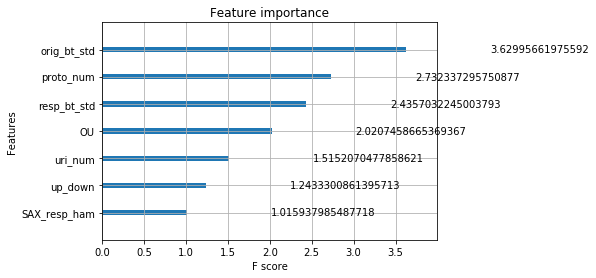

In [104]:
xgb.plot_importance(bt2, importance_type='gain')
plt.savefig('IoTDetection-7Features')
plt.show()

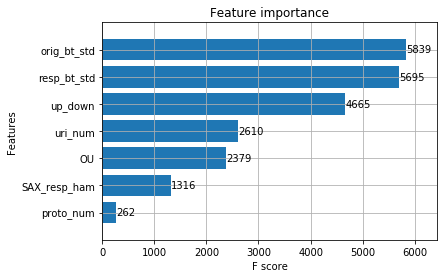

In [105]:
xgb.plot_importance(bt2, height=0.8)
plt.show()

### 4.3 Model3 ( 8 features included)
* ['proto_num','conn_state_num','orig_bt_std','resp_bt_std','uri_num','up_down','SAX_resp_ham','OU','IOT','Device']
* ['proto_num','conn_state_num','orig_bt_std','resp_bt_std','uri_num','query_num','up_down','SAX_resp_ham','IOT','Device']

In [106]:
Feature_New3 =  ['proto_num','conn_state_num','orig_bt_std','resp_bt_std','uri_num','up_down','SAX_resp_ham','OU']
X_train3 = X_train1[Feature_New3]

In [107]:
clf.fit(X_train3, yt_train1)
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Raw AUC score: 0.9924862227766772
colsample_bytree: 0.7
learning_rate: 0.05
max_depth: 8
n_estimators: 1000
objective: 'binary:logistic'
silent: 1
subsample: 0.8


In [110]:
X_test3 = X_test1[Feature_New3]

In [111]:
X_test3.shape

(1098, 8)

In [112]:
bt3 = xgb.XGBClassifier(max_depth=8,learning_rate=0.05,n_estimators=1000,colsample_bytree=0.7,silent=1,subsample=0.8)
bt3.fit(X_train3, yt_train1, eval_set=[(X_test3, yt_test1)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.8)

In [113]:
test_X3 = test_X[Feature_New3]

In [114]:
y_pred3 = bt3.predict(test_X3)
confusion_matrix(test_y,y_pred3)

array([[1110,   30],
       [  52, 1161]])

In [115]:
acc3 = np.array(test_y==y_pred3).sum() / test_y.shape[0]
acc3

0.9651508712282193

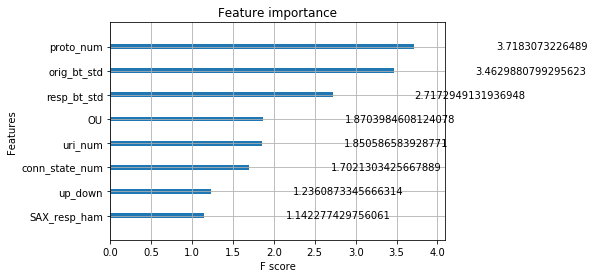

In [116]:
xgb.plot_importance(bt3, importance_type='gain')
plt.savefig('IoTDetection-8Features')
plt.show()

In [117]:
Feature_New4 =  ['proto_num','conn_state_num','orig_bt_std','resp_bt_std','uri_num','query_num','up_down','SAX_resp_ham']
X_train4 = X_train1[Feature_New4]

In [118]:
clf.fit(X_train4, yt_train1)
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Raw AUC score: 0.9934540765935652
colsample_bytree: 0.8
learning_rate: 0.05
max_depth: 8
n_estimators: 1000
objective: 'binary:logistic'
silent: 1
subsample: 0.5


In [119]:
X_test4 = X_test1[Feature_New4]

In [120]:
bt4 = xgb.XGBClassifier(max_depth=8,learning_rate=0.05,n_estimators=1000,colsample_bytree=0.8,silent=1,subsample=0.5)
bt4.fit(X_train4, yt_train1, eval_set=[(X_test4, yt_test1)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5)

In [121]:
test_X4 = test_X[Feature_New4]

In [122]:
y_pred4 = bt4.predict(test_X4)
confusion_matrix(test_y,y_pred4)

array([[1114,   26],
       [  45, 1168]])

In [123]:
acc4 = np.array(test_y==y_pred4).sum() / test_y.shape[0]
acc4

0.96982575435614105

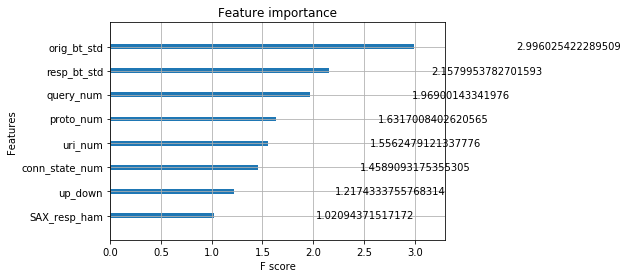

In [124]:
xgb.plot_importance(bt4, importance_type='gain')
plt.savefig('IoTDetection-8Features-2')
plt.show()

### 4.4 Model4 ( 6 features included)
*  ['proto_num','conn_state_num','uri_num','query_num','up_down','SAX_resp_ham']


In [125]:
Feature_New5 =  ['proto_num','conn_state_num','uri_num','query_num','up_down','SAX_resp_ham']
X_train5 = X_train1[Feature_New5]

In [126]:
clf.fit(X_train5, yt_train1)
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Raw AUC score: 0.8964005538492328
colsample_bytree: 0.7
learning_rate: 0.05
max_depth: 7
n_estimators: 1000
objective: 'binary:logistic'
silent: 1
subsample: 0.5


In [127]:
X_test5 = X_test1[Feature_New5]

In [128]:
bt5 = xgb.XGBClassifier(max_depth=7,learning_rate=0.05,n_estimators=1000,colsample_bytree=0.7,silent=1,subsample=0.5)
bt5.fit(X_train5, yt_train1, eval_set=[(X_test5, yt_test1)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5)

In [129]:
test_X5 = test_X[Feature_New5]
y_pred5 = bt5.predict(test_X5)
confusion_matrix(test_y,y_pred5)

array([[1068,   72],
       [ 361,  852]])

In [130]:
acc5 = np.array(test_y==y_pred5).sum() / test_y.shape[0]
acc5

0.8159796005099873

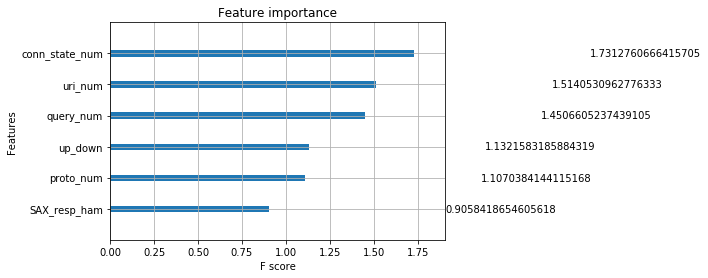

In [131]:
xgb.plot_importance(bt5, importance_type='gain')
plt.savefig('IoTDetection-6Features')
plt.show()

### 4.5 Model5 ( 5features included)
* ['proto_num','conn_state_num','orig_bt_std','resp_bt_std','query_num','IOT','Device']

In [132]:
Feature_New6 =  ['proto_num','conn_state_num','orig_bt_std','resp_bt_std','query_num']
X_train6 = X_train1[Feature_New6]

In [133]:
clf.fit(X_train6, yt_train1)
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Raw AUC score: 0.9897280095284539
colsample_bytree: 0.8
learning_rate: 0.05
max_depth: 7
n_estimators: 1000
objective: 'binary:logistic'
silent: 1
subsample: 0.8


In [134]:
X_test6 = X_test1[Feature_New6]

In [135]:
bt6 = xgb.XGBClassifier(max_depth=7,learning_rate=0.05,n_estimators=1000,colsample_bytree=0.8,silent=1,subsample=0.8)
bt6.fit(X_train6, yt_train1, eval_set=[(X_test6, yt_test1)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.8)

In [136]:
test_X6 = test_X[Feature_New6]
y_pred6 = bt6.predict(test_X6)
confusion_matrix(test_y,y_pred6)

array([[1107,   33],
       [  51, 1162]])

In [137]:
acc6 = np.array(test_y==y_pred6).sum() / test_y.shape[0]
acc6

0.96430089247768802

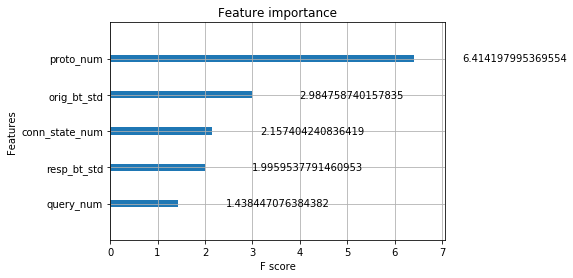

In [138]:
xgb.plot_importance(bt6, importance_type='gain')
plt.savefig('IoTDetection-5Features')
plt.show()